In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
import time
%matplotlib inline

# Insert mavenn at beginning of path
import sys
path_to_mavenn_local = '../../../../'
sys.path.insert(0,path_to_mavenn_local)

#Load mavenn and check path
import mavenn
print(mavenn.__path__)

# MAVE-NN utilities
from mavenn.src.dev import mutations_to_dataset

['../../../../mavenn']


In [2]:
# Save data_df
file_name = '../ace2rbd_data.csv.gz'
data_df = pd.read_csv(file_name, compression='gzip')

In [3]:
# Split into training and test sets
ix = data_df['training_set']
training_df = data_df[ix].copy()
test_df = data_df[~ix].copy()

In [4]:
# Set seeed
mavenn.set_seed(0)

# Define additive model
model = mavenn.Model(x=training_df['x'].values,
                     y=training_df['y'].values,
                     alphabet='protein',
                     gpmap_type='additive',
                     regression_type='GE',
                     ge_noise_model_type='SkewedT',
                     ge_heteroskedasticity_order=2, 
                     linear_initialization=True)

# Fit additive model
history = model.fit(epochs=1000, 
                    early_stopping=True, 
                    early_stopping_patience=20,
                    learning_rate=.0005, 
                    batch_size=50)

 
LSMR            Least-squares solution of  Ax = b

The matrix A has   117078 rows  and     4020 cols
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =     4020

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.050e+03  3.787e+06   1.0e+00  3.4e+00
     1 -3.37573e-06  6.907e+02  1.684e+04   6.6e-01  5.1e-03  4.8e+03  1.0e+00
     2  2.42807e-03  5.741e+02  7.137e+03   5.5e-01  2.6e-03  4.8e+03  1.1e+02
     3 -8.72251e-04  5.393e+02  4.591e+03   5.1e-01  1.8e-03  4.8e+03  1.4e+02
     4 -8.73481e-04  5.393e+02  4.590e+03   5.1e-01  1.8e-03  4.8e+03  1.1e+02
     5 -8.49364e-03  5.189e+02  3.792e+03   4.9e-01  1.1e-03  6.8e+03  1.7e+02
     6 -2.23548e-02  4.948e+02  3.195e+03   4.7e-01  9.5e-04  6.8e+03  2.2e+02
     7 -4.10762e-02  4.688e+02  2.734e+03   4.5e-01  8.6e-04  6.8e+03  2.6e+02
     8 -4.10810e-02  4.688e+02  2.734e+03   4.5e-01  8.6e-04  6.8e+03  1.3

Epoch 55/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 35.5386 - val_loss: 50.0091
Epoch 56/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 35.1749 - val_loss: 52.4636
Epoch 57/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 35.0476 - val_loss: 49.9207
Epoch 58/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 34.4912 - val_loss: 84.0851
Epoch 59/1000
1874/1874 [==============================] - 6s 3ms/step - loss: 33.9442 - val_loss: 52.3766
Epoch 60/1000
1874/1874 [==============================] - 5s 3ms/step - loss: 33.3736 - val_loss: 53.2161
Epoch 61/1000
1874/1874 [==============================] - 5s 2ms/step - loss: 33.2134 - val_loss: 51.1600
Epoch 62/1000
1874/1874 [==============================] - 5s 3ms/step - loss: 33.2309 - val_loss: 48.3947
Epoch 63/1000
1874/1874 [==============================] - 5s 2ms/step - loss: 32.7531 - val_loss: 47.9482
Epoch 64/1000
1874/1874 [============

1874/1874 [==============================] - 4s 2ms/step - loss: 25.1822 - val_loss: 42.3973
Epoch 132/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 24.6258 - val_loss: 38.1085
Epoch 133/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 25.1680 - val_loss: 38.7316
Epoch 134/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 24.7310 - val_loss: 39.7031
Epoch 135/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 24.6588 - val_loss: 38.5733
Epoch 136/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 24.4316 - val_loss: 40.1365
Epoch 137/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 24.6308 - val_loss: 38.4167
Epoch 138/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 24.4875 - val_loss: 38.2270
Epoch 139/1000
1874/1874 [==============================] - 4s 2ms/step - loss: 24.5790 - val_loss: 43.0014
Epoch 140/1000
1874/1874 [=================

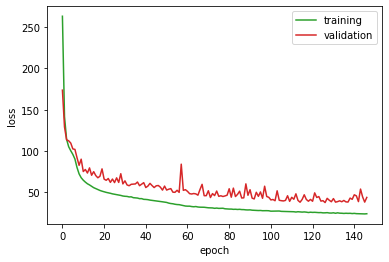

In [5]:
# Extract training loss and validation loss
history_dict = history.history
loss_training = history_dict['loss']
loss_validation = history_dict['val_loss']

# Plot model training history
fig, ax = plt.subplots()
ax.plot(loss_training, color='C2', label='training')
ax.plot(loss_validation, color='C3', label='validation')
ax.set_ylabel('loss')
ax.set_xlabel('epoch')
ax.legend()

In [6]:
# Determine wild-type sequence
wt_seq = mavenn.x_to_consensus(training_df['x'])
wt_seq

'NITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKST'

In [7]:
# Get mask, if any. Will show which amino acids were not assayed
mask_dict = mavenn.get_mask_dict(training_df['x'], alphabet='protein')
mask_dict

{19: 'F', 66: 'EKMQW', 192: 'CEHKMQW', 193: 'CEFHKMNQS'}

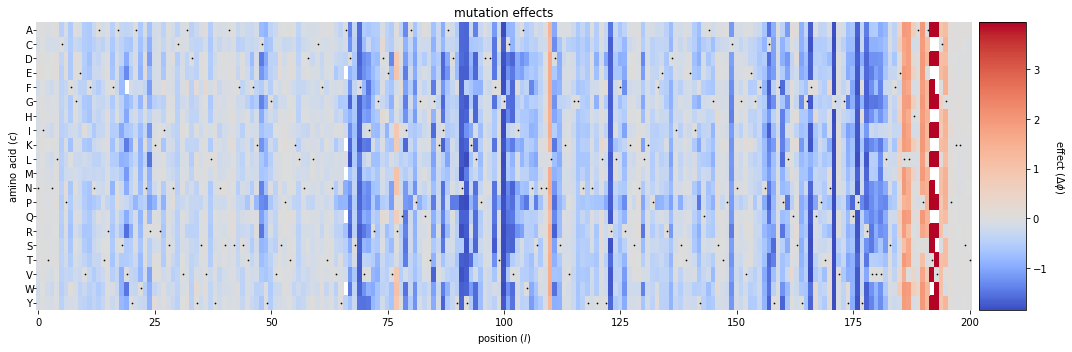

In [8]:
# Get effects of all single-point mutations on phi
dphi_df = mavenn.get_1pt_effects(func=model.x_to_phi,
                                 wt_seq=wt_seq,
                                 alphabet='protein')
# Draw heatmap
fig, ax = plt.subplots(figsize=[15,5])
ax, cb = mavenn.heatmap(dphi_df,
                        ccenter=0,
                        clim_quantile=.99,
                        mask_dict=mask_dict,
                        missing_values=0,
                        c_col='c_mut',
                        l_col='l',
                        value_col='dphi',
                        seq=wt_seq,
                        #cmap='PiYG',
                        ax=ax)
ax.set_xlabel('position ($l$)')
ax.set_ylabel('amino acid ($c$)')
cb.set_label('effect ($\Delta\phi$)', rotation=-90, va="bottom")
ax.set_title('mutation effects')
fig.tight_layout()
fig.savefig('ace2rbd.pdf')

In [9]:
N = len(test_df['x'].values)
ix = np.random.rand(N) < .5

# Extract data into np.arrays
x = test_df['x'].values[ix]
y = test_df['y'].values[ix]

# Compute phi and yhat values
phi = model.x_to_phi(x)
yhat = model.phi_to_yhat(phi)

# Create grid for plotting yhat and yqs
phi_lim = [-5, 2.5]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)
yhat_grid = model.phi_to_yhat(phi_grid)
yqs_grid = model.yhat_to_yq(yhat_grid, q=[.05,.95])

Text(0.5, 1.0, 'measurement process')

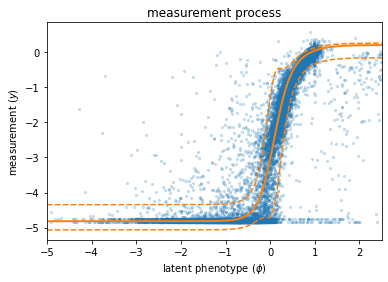

In [10]:
fig, ax = plt.subplots()

ax.scatter(phi, y, color='C0', s=5, alpha=.2, label='test data')
ax.plot(phi_grid, yhat_grid, linewidth=2, color='C1',
        label='$\hat{y} = g(\phi)$')
ax.plot(phi_grid, yqs_grid[:, 0], linestyle='--', color='C1',
        label='68% CI')
ax.plot(phi_grid, yqs_grid[:, 1], linestyle='--', color='C1')
ax.set_xlim(phi_lim)
#ax.set_ylim([-10, 10])
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_ylabel('measurement ($y$)')
ax.set_title('measurement process')

In [11]:
# Save model
model.save('ace2rbd_model')

Model saved to these files:
	ace2rbd_model.pickle
	ace2rbd_model.h5
